# Volume 4: Introduction to Initial Value Problems and Boundary Value Problems

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Problem 1
Use solve_ivp to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

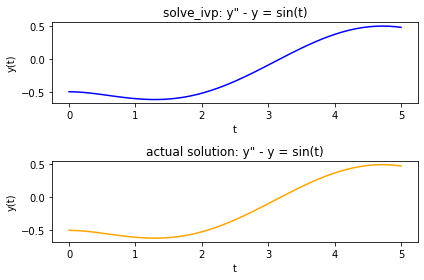

In [26]:
# ODE function
def ode(t,y):
    return np.array([y[1], np.sin(t) + y[0]])

# time domain
t_span = (0, 5)

# initial conditions
y0 = np.array([-1.0/2, 0])

# solve the system
sol = solve_ivp(ode, t_span, y0, max_step=0.1)

# plot the computed solution
plt.subplot(211)
plt.plot(sol.t, sol.y[0], color='blue',label="Computational")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("solve_ivp: y\" - y = sin(t)")

def f(t):
    return -1./2*(np.e**(-1*t) + np.sin(t))
plt.subplot(212)
plt.plot(np.linspace(0, 5, 50), f(np.linspace(0,5,50)), color='orange',label="Analytic")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("actual solution: y\" - y = sin(t)")
plt.tight_layout()

plt.show()

### Problem 2

Use solve_bvp to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

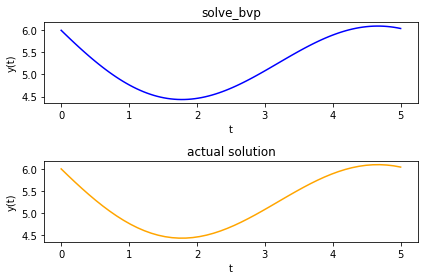

In [28]:
# define ode, time span, boundary conditions, and initial values

def ode(t,y):
    return np.array([y[1], -1*y[1] - 1./4*np.e**(-0.5*t) + np.sin(t) - np.cos(t)])

t_steps = 100
t = np.linspace(0, 5, t_steps)

def bc(ya, yb):
    # ya are initial values
    # yb are final values
    # each entry of return array is set to 0
    return np.array([ya[0]-6, yb[1] + 0.324705])

y0 = np.ones((2, t_steps))

# solve
sol = solve_bvp(ode, bc, t, y0)

# plot the computed solution
plt.subplot(211)
plt.plot(sol.x, sol.y[0], color='blue',label="Computed")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("solve_bvp")

# plot analytical solution
def f(t):
    return np.e**(-0.5*t) - np.sin(t) + 5
plt.subplot(212)
plt.plot(np.linspace(0, 5, 50), f(np.linspace(0,5,50)), color='orange',label="Analytic")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("actual solution")
plt.tight_layout()

plt.show()

### Problem 3

Use solve_bvp to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

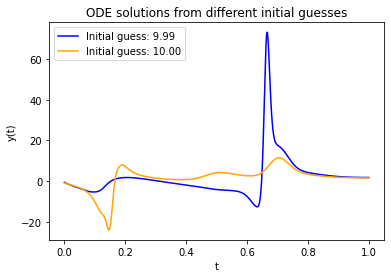

In [42]:
# define ode, time span, boundary conditions, and initial values

def ode(t,y):
    return np.array([y[1], (1-y[1])*10*y[0]])

t_steps = 50
t = np.linspace(0, 1, t_steps)

def bc(ya, yb):
    # ya are initial values
    # yb are final values
    # each entry of return array is set to 0
    return np.array([ya[0]+1, yb[0]-3./2])

# Guess of 9.99
y0 = np.ones((2, t_steps))*9.99
# solve
sol = solve_bvp(ode, bc, t, y0)
# plot solution with guess of 9.99
plt.plot(sol.x, sol.y[0], color='blue',label="Initial guess: 9.99")

# Guess of 10
y0 = np.ones((2, t_steps))*10
# solve
sol = solve_bvp(ode, bc, t, y0)
# plot the solution with guess of 10
plt.plot(sol.x, sol.y[0], color='orange',label="Initial guess: 10.00")

plt.title("ODE solutions from different initial guesses")
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

### Problem 4
Use solve_ivp to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

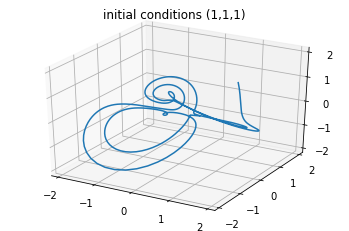

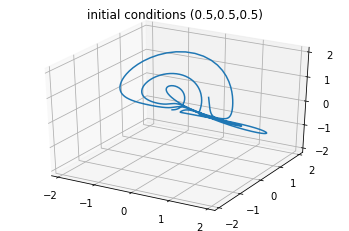

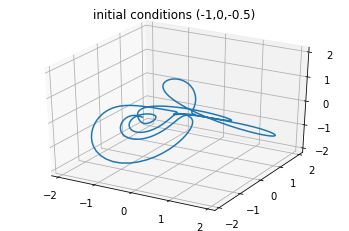

In [51]:
# ODE function
# q = [x, y, z]

def ode(t,q):
    return np.array([0.2*q[0]+q[1]*q[2], 
                     0.01*q[0]+-0.4*q[1]-q[0]*q[2], 
                     -q[2]-q[0]*q[1]])

# time domain
t_span = (0, 100)

# initial conditions (3 different sets)
y1 = np.ones(3)*1
y2 = np.ones(3)*0.5
y3 = np.array([-1, 0, -0.5])

# solve the system (3 solutions)
sol1 = solve_ivp(ode, t_span, y1, max_step=0.1)
sol2 = solve_ivp(ode, t_span, y2, max_step=0.1)
sol3 = solve_ivp(ode, t_span, y3, max_step=0.1)

# set plot format (#1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-2.1,2.1))
ax.set_ylim((-2.1,2.1))
ax.set_zlim((-2.1,2.1))
ax.set_xticks(ticks=np.linspace(-2, 2, 5))
ax.set_yticks(ticks=np.linspace(-2, 2, 5))
ax.set_zticks(ticks=np.linspace(-2, 2, 5))
ax.set_title("initial conditions (1,1,1)")

ax.plot(sol1.y[0], sol1.y[1], sol1.y[2])
plt.show()

# set plot format (#2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-2.1,2.1))
ax.set_ylim((-2.1,2.1))
ax.set_zlim((-2.1,2.1))
ax.set_xticks(ticks=np.linspace(-2, 2, 5))
ax.set_yticks(ticks=np.linspace(-2, 2, 5))
ax.set_zticks(ticks=np.linspace(-2, 2, 5))
ax.set_title("initial conditions (0.5,0.5,0.5)")

ax.plot(sol2.y[0], sol2.y[1], sol2.y[2])

# set plot format (#2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-2.1,2.1))
ax.set_ylim((-2.1,2.1))
ax.set_zlim((-2.1,2.1))
ax.set_xticks(ticks=np.linspace(-2, 2, 5))
ax.set_yticks(ticks=np.linspace(-2, 2, 5))
ax.set_zticks(ticks=np.linspace(-2, 2, 5))
ax.set_title("initial conditions (-1,0,-0.5)")

ax.plot(sol3.y[0], sol3.y[1], sol3.y[2])
